In [46]:
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import BatchNormalization, Dropout
from tensorflow.keras.callbacks import EarlyStopping
import random

# Import data

In [52]:
# (train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.cifar10.load_data()

# Load the data from your .npz file
data = np.load('cifar10_dataset.npz')

# Extract the arrays from the file
train_images = data['train_images']
train_labels = data['train_labels']
test_images = data['test_images']
test_labels = data['test_labels']

print("CIFAR-10 dataset loaded successfully from .npz file.")

CIFAR-10 dataset loaded successfully from .npz file.


In [58]:
print(train_images)

[[[[ 59  62  63]
   [ 43  46  45]
   [ 50  48  43]
   ...
   [158 132 108]
   [152 125 102]
   [148 124 103]]

  [[ 16  20  20]
   [  0   0   0]
   [ 18   8   0]
   ...
   [123  88  55]
   [119  83  50]
   [122  87  57]]

  [[ 25  24  21]
   [ 16   7   0]
   [ 49  27   8]
   ...
   [118  84  50]
   [120  84  50]
   [109  73  42]]

  ...

  [[208 170  96]
   [201 153  34]
   [198 161  26]
   ...
   [160 133  70]
   [ 56  31   7]
   [ 53  34  20]]

  [[180 139  96]
   [173 123  42]
   [186 144  30]
   ...
   [184 148  94]
   [ 97  62  34]
   [ 83  53  34]]

  [[177 144 116]
   [168 129  94]
   [179 142  87]
   ...
   [216 184 140]
   [151 118  84]
   [123  92  72]]]


 [[[154 177 187]
   [126 137 136]
   [105 104  95]
   ...
   [ 91  95  71]
   [ 87  90  71]
   [ 79  81  70]]

  [[140 160 169]
   [145 153 154]
   [125 125 118]
   ...
   [ 96  99  78]
   [ 77  80  62]
   [ 71  73  61]]

  [[140 155 164]
   [139 146 149]
   [115 115 112]
   ...
   [ 79  82  64]
   [ 68  70  55]
   [ 67  69

In [57]:
print("Unique train labels:", np.unique(train_labels))


Unique train labels: [0 1 2 3 4 5 6 7 8 9]


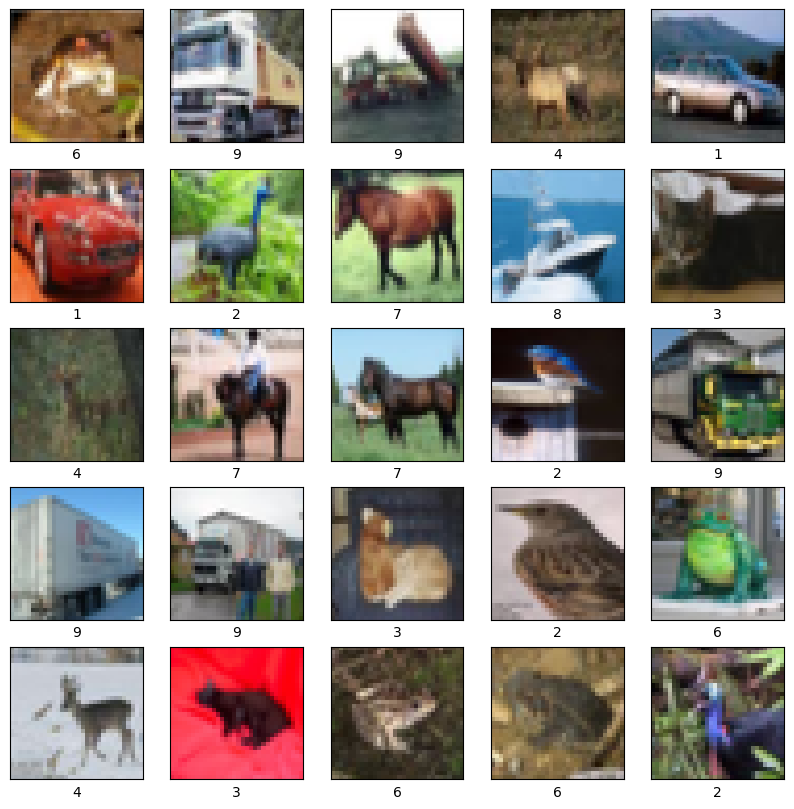

In [59]:
# Display the first 25 images with their numeric labels
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i])
    plt.xlabel(train_labels[i][0])  # numeric label
plt.show()

In [53]:
print('train_images shape:', train_images.shape)
print('train_labels shape:', train_labels.shape)
print('test_images shape:', test_images.shape)
print('test_labels shape:', test_labels.shape)


# 50000 = number of training images
# 32, 32 = height × width (resolution of each image in pixels)
# 3 = color channels → RGB (Red, Green, Blue)

train_images shape: (50000, 32, 32, 3)
train_labels shape: (50000, 1)
test_images shape: (10000, 32, 32, 3)
test_labels shape: (10000, 1)


# Normalize the data & One hot encode the labels

In [16]:
# Maximum pixel value across train and test images
max_val = max(train_images.max(), test_images.max())

# Normalize images to range 0-1
train_images = train_images.astype('float32') / max_val
test_images  = test_images.astype('float32') / max_val


# One-hot encoding the labels
y_train_cat = to_categorical(train_labels, num_classes=10)
y_test_cat  = to_categorical(test_labels, num_classes=10)

# Matches the network’s softmax output ( probability distribution over 10 classes)
# One-hot encoding converts a class index into a binary vector of length num_classes
# Example with 10 classes:
# Label = 3 → [0,0,0,1,0,0,0,0,0,0]
# Label = 7 → [0,0,0,0,0,0,0,1,0,0]


print(f"Max value used for normalization: {max_val}")


Max value used for normalization: 1.0


In [17]:
print(f"train_images shape: {train_images.shape}, dtype: {train_images.dtype}")
print(f"train_labels shape: {train_labels.shape}, dtype: {train_labels.dtype}")

train_images shape: (50000, 32, 32, 3), dtype: float32
train_labels shape: (50000, 1), dtype: uint8


In [18]:
train_images


array([[[[0.23137255, 0.24313726, 0.24705882],
         [0.16862746, 0.18039216, 0.1764706 ],
         [0.19607843, 0.1882353 , 0.16862746],
         ...,
         [0.61960787, 0.5176471 , 0.42352942],
         [0.59607846, 0.49019608, 0.4       ],
         [0.5803922 , 0.4862745 , 0.40392157]],

        [[0.0627451 , 0.07843138, 0.07843138],
         [0.        , 0.        , 0.        ],
         [0.07058824, 0.03137255, 0.        ],
         ...,
         [0.48235294, 0.34509805, 0.21568628],
         [0.46666667, 0.3254902 , 0.19607843],
         [0.47843137, 0.34117648, 0.22352941]],

        [[0.09803922, 0.09411765, 0.08235294],
         [0.0627451 , 0.02745098, 0.        ],
         [0.19215687, 0.10588235, 0.03137255],
         ...,
         [0.4627451 , 0.32941177, 0.19607843],
         [0.47058824, 0.32941177, 0.19607843],
         [0.42745098, 0.28627452, 0.16470589]],

        ...,

        [[0.8156863 , 0.6666667 , 0.3764706 ],
         [0.7882353 , 0.6       , 0.13333334]

# Visualize the images

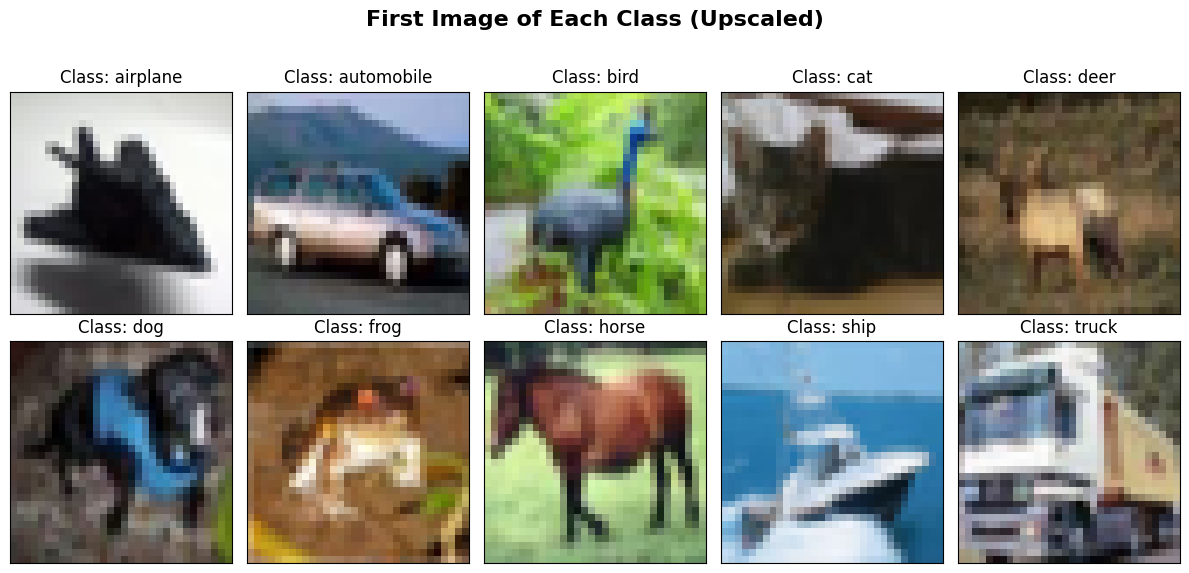

In [38]:
# Showing the train images

class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

unique_labels = np.unique(train_labels)
plt.figure(figsize=(12, 6)) # Increased figure size for better viewing
plt.suptitle('First Image of Each Class (Upscaled)', fontsize=16, fontweight='bold')

for i, label in enumerate(unique_labels):
    # Find the index of the first image with this label
    index = np.where(train_labels == label)[0][0]
    
    plt.subplot(2, 5, i + 1)
    # Use interpolation='nearest' to upscale without blurring
    plt.imshow(train_images[index], interpolation='nearest') 
    plt.title(f"Class: {class_names[label]}", fontsize=12)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)

plt.tight_layout(rect=[0, 0, 1, 0.96]) # Adjust layout for main title
plt.show()

# Build the model

In [35]:
# Conv2D: extracts features (edges, textures, patterns) using filters
    # each filter is like a feature/pattern detector ( vertical lines , edges etc ) stacking filters together larger features can be detected
    # the filter goes through strides over whole image and performs convolution operation , 
    # result is a matrix that represents simlilarness of the filter to the input image matrix 


# MaxPooling: downsamples feature maps, keeps strongest features, reduces size & overfitting
    # used after convolution layers to reduce size of intermediate features ( downsampling ) 
    # extracts dominant features only
    #  eg : 4x4 -> 2x2 with max pooling 
    # reduce the total no of filter layers required ( avoiding vanishing gradient and lower compute ) 
    
# BatchNormalization() is a layer that normalizes the outputs of the previous layer so they have a stable mean and variance during training.
    # Keeps activations in a stable range
    # Speeds up training
    # Reduces chances of getting stuck (vanishing/exploding gradients)
    # Adds a bit of regularization (less overfitting)

# Dropout layer
# Dropout(0.25) randomly turns off (drops) 25% of the neurons during training.
# Prevents overfitting
# Forces the network to learn more robust features (not rely on specific neurons)


model = models.Sequential([
    # First convolution block
    # 32 filters
    # (3, 3) kernel size
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    Dropout(0.25),

    # Second convolution block
    # 64 filters
    layers.Conv2D(64, (3, 3), activation='relu'),
    BatchNormalization(),
    # (2, 2) kernel size
    layers.MaxPooling2D((2, 2)),
    Dropout(0.25),

    # Third convolution block
    # 64 filters
    layers.Conv2D(64, (3, 3), activation='relu'),
    BatchNormalization(),

    # Flatten and dense layers
    layers.Flatten(),
    # 64 neurons
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')  # Output layer with softmax for multi class classification
])


model.summary()

/Users/hemanggs/Library/Python/3.9/lib/python/site-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)               │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_6           │ (None, 30, 30, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 13, 13, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_7           │ (None, 13, 13, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 4, 4, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_8           │ (None, 4, 4, 64)       │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 64)             │        65,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 123,210 (481.29 KB)

 Trainable params: 122,890 (480.04 KB)

 Non-trainable params: 320 (1.25 KB)

In [43]:
# Compile the model
# adam optimizer — the algorithm that updates the weights of your neural network during training
# Adaptive Moment Estimation
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import Precision, Recall


adam_optimizer = Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999)


model.compile(
    optimizer=adam_optimizer,
    loss='categorical_crossentropy',
    metrics=['accuracy', Precision(), Recall()]
)

# Train the model

In [27]:
# Maximum number of epochs to train
max_epochs = 15

# Early Stopping
# Stop training early if validation loss doesn't improve for 3 consecutive epochs
early_stop = EarlyStopping(
    monitor='val_loss',  # use validation loss to decide when to stop
    patience=3, 
    restore_best_weights=True
)

# Train the model
history = model.fit(
    train_images, y_train_cat,
    validation_data=(test_images, y_test_cat),
    epochs=max_epochs,      # Training will stop early if no improvement
    callbacks=[early_stop],
    batch_size=64, # 64 images at a time
    verbose=1
)

Epoch 1/15
782/782 ━━━━━━━━━━━━━━━━━━━━ 17s 22ms/step - accuracy: 0.7946 - loss: 0.5758 - val_accuracy: 0.7043 - val_loss: 0.8788
Epoch 2/15
782/782 ━━━━━━━━━━━━━━━━━━━━ 16s 21ms/step - accuracy: 0.8032 - loss: 0.5557 - val_accuracy: 0.7282 - val_loss: 0.8058
Epoch 3/15
782/782 ━━━━━━━━━━━━━━━━━━━━ 17s 21ms/step - accuracy: 0.8059 - loss: 0.5456 - val_accuracy: 0.7290 - val_loss: 0.8201
Epoch 4/15
782/782 ━━━━━━━━━━━━━━━━━━━━ 16s 21ms/step - accuracy: 0.8175 - loss: 0.5084 - val_accuracy: 0.7484 - val_loss: 0.7656
Epoch 5/15
782/782 ━━━━━━━━━━━━━━━━━━━━ 16s 20ms/step - accuracy: 0.8244 - loss: 0.4960 - val_accuracy: 0.6287 - val_loss: 1.2632
Epoch 6/15
782/782 ━━━━━━━━━━━━━━━━━━━━ 16s 21ms/step - accuracy: 0.8267 - loss: 0.4870 - val_accuracy: 0.7093 - val_loss: 0.9385
Epoch 7/15
782/782 ━━━━━━━━━━━━━━━━━━━━ 14s 18ms/step - accuracy: 0.8304 - loss: 0.4742 - val_accuracy: 0.6845 - val_loss: 1.0684


In [28]:
train_loss, train_acc = model.evaluate(train_images, y_train_cat)

print(f"Training Loss: {train_loss:.3f}")
print(f"Training Accuracy: {train_acc:.2f}")

1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8640 - loss: 0.3894
Training Loss: 0.393
Training Accuracy: 0.86


In [29]:
test_loss, test_acc = model.evaluate(test_images, y_test_cat, verbose=0)

print(f"Test Loss: {test_loss:.3f}")
print(f"Test Accuracy: {test_acc:.2f}")

Test Loss: 0.766
Test Accuracy: 0.75


In [30]:
predicted_values = model.predict(test_images)

print("Shape of predicted values:", predicted_values.shape)
# one hot encoded output

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
Shape of predicted values: (10000, 10)


# Random image test

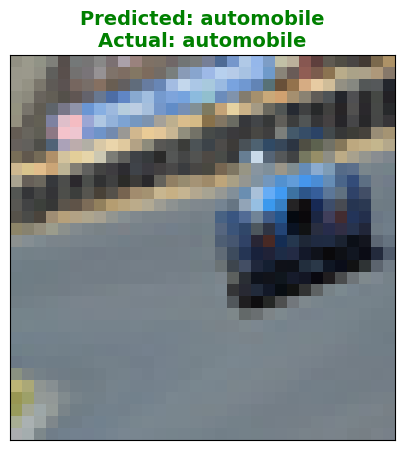

In [40]:
# Pick a random test image
n = random.randint(0, len(test_images)-1)

plt.figure(figsize=(5,5)) # Slightly larger figure for a better view
# Use interpolation='nearest' to display the pixels as larger blocks
plt.imshow(test_images[n], interpolation='nearest')
plt.xticks([])
plt.yticks([])
plt.grid(False)

# Get predicted and actual labels
predicted_label_index = np.argmax(predicted_values[n])
predicted_label = class_names[predicted_label_index]
actual_label = class_names[test_labels[n][0]]

# Set title color based on prediction correctness
title_color = 'green' if predicted_label == actual_label else 'red'

plt.title(f"Predicted: {predicted_label}\nActual: {actual_label}", 
          fontsize=14, fontweight='bold', color=title_color)
plt.show()

# Accuracy v/s Epoch graph

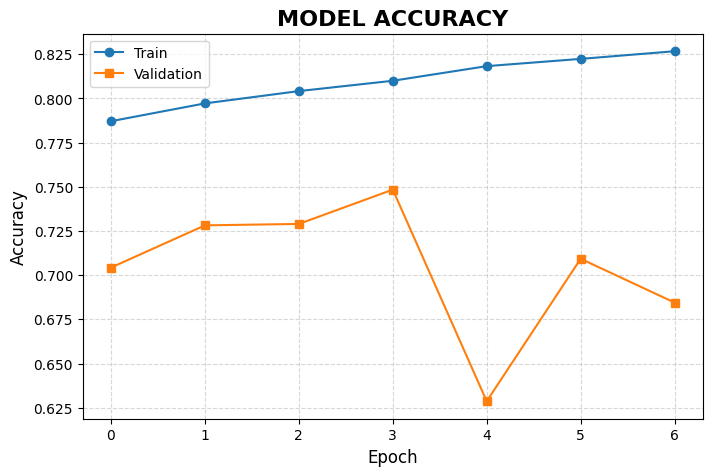

In [34]:
plt.figure(figsize=(8,5))
plt.plot(history.history['accuracy'], marker='o')
plt.plot(history.history['val_accuracy'], marker='s')
plt.title('MODEL ACCURACY', fontsize=16, fontweight='bold')
plt.ylabel('Accuracy', fontsize=12)
plt.xlabel('Epoch', fontsize=12)
plt.legend(['Train', 'Validation'], loc='upper left')
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()